In [1]:
import pandas as pd
import os
import re
from nltk.corpus import stopwords
import numpy as np
import nltk
from bs4 import BeautifulSoup
import codecs
from sklearn import feature_extraction

In [2]:
directory = "C:\\Users\\44070779\\Desktop\\docu"

In [3]:
f_names = []
filenames = os.listdir(directory)
for file in filenames:
    f_name = os.path.join(directory, file)
    f_names.append(f_name)

In [4]:
data_corpus = {}

for f in filenames:
    f_name = os.path.join(directory, f)
    fi = open(f_name)
    data = fi.read()
    data_corpus[f] = data


In [5]:
data_corpus['01 EMIR Clearing Project Team Meeting - Key Notes and Actions 040116.txt']

'RESTRICTED\n\t\n\nGBM EMIR Clearing Project Working Group\nNotes and Actions \n4 January 2016\n\nProject Team - Meeting Attendance Register\nName\rInitials\r19/10/15\r26/10/15\r2/11/15\r09/11/15\r16/11/15\r23/11\r30/11/15\r7/12\r14/12\r04/01\rGail Torbet\rGT\r?\r?\r?\r?\r?\rIssued Actions Log only as update\r?\r?\r?\r?\rClare Jenkinson\rCEJ\r? \r?\r?\r? Apologies\r?\r\r?\r?\r?\r?\rChristophe Jacob\rCJ\r?\r? Apologies\r?\r?\r?\r\r?\r?\r?\r?\rAndrew Clews\rAC\r?\r?\r?\r?\r?\r\r?\r?\r?\rOn hols\rSamir Basic\rSB\r? \r?\r?\r?\r?\r\r?\r\r?\r?\rMark Frith\rMF\r?\r\r?\r?\r?\r\r?\r?\r?\r?\rMarc Twibill\rMTw\r?\r?\r?\r?\r?\r\r?\r?\r?\r?\rMike Turner\rMT\rx\r?\r?\r?\r?\r\r?\r?\r?\r?\rDanielle Hoffland\rDH\r?\r?\r?\r?\r?\r\r?\r?\r?\r?\rSimon Kyriazis\rSK\r? \r?\r?\r?\r?\r\r?\r?\r?\r?\rThomas Hicks\rTH\r\r\r\r\r?\r\r?\r?\r?\rOn hols\rVimesh Vipani\rVV\r\r\r\r\r\r\r?\r?\r?\r?\rVivek Gupta\rVG\r\r\r\r\r\r\r?\r?\r?\r?\rAbhishek Sharma\rAS\r\r\r\r\r\r\r\r?\r?\r?\rNikki Butler\rNB\r\r\r\r\r\r\r?\r?\r?\

In [6]:
def strip(raw_text):
    letters_only = re.sub('[\s+]', " ", raw_text)
    return letters_only

In [7]:
data = pd.DataFrame.from_dict(data_corpus,orient='index')

In [8]:
data = data.reset_index()
data.columns = ['file_name','text']

In [9]:
data

,file_name,text
0,FIM.txt,FIM Sections relating to Limit Review\n\nB.20....
1,CTR US KYC PR - FINAL REPORT 20150618.txt,\n\n\n\n\n\nBanking Operations Business Risk a...
2,One HSBC Custody- HSS Oversight Committee Minu...,Attendees:\rInitials\rApologies\rInitials\rRaj...
3,issuer -419868 Contactless.txt,\n\n\n\n\n\nIssuer\nMember Information Questio...
4,GS Core Business Team Agenda v1.0_25082015.txt,Date\r25 August 2015\rSt James � Dial In Only ...
5,GBM Mexcio_ITGC Walkthrough PD v1.0.txt,IT General Controls]\nGBM Mexico Walk-through ...
6,One HSBC Custody- HSS Oversight Committee Minu...,Attendees:\rInitials\rApologies\rInitials\rRaj...
7,Ana Ocampo Inpput and Draft - 2015 Takeovers a...,Response from Ana Ocampo (30/07/2015):\nHi Jon...
8,7.1 FIM Dispensations v1.2.txt,\n\nFIM Dispensations\nProcurement FIM Dispens...
9,Self_assessment_Mosaic_v5.txt,Name of Authorised Institution (AI):__________...


In [10]:
data['strip']= data['text'].apply(strip)

In [11]:
data['strip'][0]

'FIM Sections relating to Limit Review  B.20.2.1 General Principles Policy Approval and delegation of market risk limits.  Risk Type Primary: Market Secondary:  Purpose General principles of market risk limits.  Application The level of market risk limits set for each operation depends upon: the size and financial and capital resources of the business, the business plan, the experience and track record of the management and dealers, internal audit gradings from Group Financial Services Audit (GHQ AUF), support function resources and computer systems.  Market Risk limits should be sufficiently granular and of a level to ensure that large and significant concentrations to sectors, risk factors and counterparties are not allowed to build up that could threaten the ongoing operations of HSBC Group.  Throughout Section B.20 limits refers to the limit mandate which where applicable also includes the permitted instrument list.  See Appendix D20.2.1 for definition of Major Limits, Minor Limits

In [12]:
import nltk
import string

In [13]:
def remove_punctuation(s):
    s = ''.join([i for i in s if i not in frozenset(string.punctuation)])
    return s

data['text_punc'] = data['strip'].apply(remove_punctuation)

In [14]:
data['text_punc'][0]

'FIM Sections relating to Limit Review  B2021 General Principles Policy Approval and delegation of market risk limits  Risk Type Primary Market Secondary  Purpose General principles of market risk limits  Application The level of market risk limits set for each operation depends upon the size and financial and capital resources of the business the business plan the experience and track record of the management and dealers internal audit gradings from Group Financial Services Audit GHQ AUF support function resources and computer systems  Market Risk limits should be sufficiently granular and of a level to ensure that large and significant concentrations to sectors risk factors and counterparties are not allowed to build up that could threaten the ongoing operations of HSBC Group  Throughout Section B20 limits refers to the limit mandate which where applicable also includes the permitted instrument list  See Appendix D2021 for definition of Major Limits Minor Limits and Thresholds   B202

In [15]:
def numbers(raw_text):
    letters_only = re.sub(r'\d+', '', raw_text)
    return letters_only

In [16]:
data['num'] = data['text_punc'].apply(numbers)

In [17]:
data['num'][0]

'FIM Sections relating to Limit Review  B General Principles Policy Approval and delegation of market risk limits  Risk Type Primary Market Secondary  Purpose General principles of market risk limits  Application The level of market risk limits set for each operation depends upon the size and financial and capital resources of the business the business plan the experience and track record of the management and dealers internal audit gradings from Group Financial Services Audit GHQ AUF support function resources and computer systems  Market Risk limits should be sufficiently granular and of a level to ensure that large and significant concentrations to sectors risk factors and counterparties are not allowed to build up that could threaten the ongoing operations of HSBC Group  Throughout Section B limits refers to the limit mandate which where applicable also includes the permitted instrument list  See Appendix D for definition of Major Limits Minor Limits and Thresholds   B Review of Gr

In [18]:
from nltk import pos_tag

In [19]:
words = set(nltk.corpus.words.words())
def non_eng_text(raw_text):
    wor = raw_text.split()
    meaningful_words = [w for w in wor \
         if w.lower() in words or not w.isalpha()]
    return( " ".join( meaningful_words ))

In [20]:
data['non_eng']= data['num'].apply(non_eng_text)

C:\Users\44070779\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  after removing the cwd from sys.path.


In [21]:
data['non_eng'][0]

'to Limit Review B General Policy Approval and delegation of market risk Risk Type Primary Market Secondary Purpose General of market risk Application The level of market risk set for each operation upon the size and financial and capital of the business the business plan the experience and track record of the management and internal audit from Group Financial Audit support function and computer Market Risk should be sufficiently granular and of a level to ensure that large and significant to risk and are not to build up that could threaten the ongoing of Group Throughout Section B to the limit mandate which where applicable also the permitted instrument list See Appendix D for definition of Major Minor and B Review of Group Policy Market risk must be annually Risk Type Primary Market Secondary Purpose To establish formal market risk annually for each site within Group Application The Annual Limit Review will be prepared by Group Risk and by the Risk Management Meeting of the Group Man

In [22]:
data['lower'] = data['non_eng'].str.lower()

In [23]:
data['lower'][0]

'to limit review b general policy approval and delegation of market risk risk type primary market secondary purpose general of market risk application the level of market risk set for each operation upon the size and financial and capital of the business the business plan the experience and track record of the management and internal audit from group financial audit support function and computer market risk should be sufficiently granular and of a level to ensure that large and significant to risk and are not to build up that could threaten the ongoing of group throughout section b to the limit mandate which where applicable also the permitted instrument list see appendix d for definition of major minor and b review of group policy market risk must be annually risk type primary market secondary purpose to establish formal market risk annually for each site within group application the annual limit review will be prepared by group risk and by the risk management meeting of the group man

In [24]:
#def noun_text(raw_text):
    #letters_only = re.sub("[^A-Za-z]", " ", raw_text)
    ##words = raw_text.split()
   # tagged_sent = nltk.tag.pos_tag(words)
    #edited_sent = [word for word,tag in tagged_sent if tag != 'NNP' and tag != 'NNPS']
    #return (' '.join(edited_sent))

In [25]:
#data['text_noun']= data['num'].apply(noun_text)

In [26]:
#data['text_noun'][0]

In [27]:
def clean_text(raw_text):
    letters_only = re.sub("[^a-z]", " ", raw_text)
    words = letters_only.split()
    corp = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now']
    stops = set(corp)
    meaningful_words = [w for w in words if not w in stops and len(w)>1]
    return( " ".join( meaningful_words ))

In [28]:
data['stop']= data['lower'].apply(clean_text)

In [29]:
data['stop'][0]

'limit review general policy approval delegation market risk risk type primary market secondary purpose general market risk application level market risk set operation upon size financial capital business business plan experience track record management internal audit group financial audit support function computer market risk sufficiently granular level ensure large significant risk build could threaten ongoing group throughout section limit mandate applicable also permitted instrument list see appendix definition major minor review group policy market risk must annually risk type primary market secondary purpose establish formal market risk annually site within group application annual limit review prepared group risk risk management meeting group management board year site submit request annually apply market risk covering following calendar year group risk writing clearly indicate support relevant principal office manager delegate applicable local regional head global regional head

In [30]:
from nltk import pos_tag

In [31]:
#def noun_text(raw_text):
   # words = raw_text.split()
    #meaningful_words = [word for word,pos in pos_tag(words) if pos != 'NN']
    #return( " ".join( meaningful_words ))

In [32]:
#data['noun']= data['stop'].apply(noun_text)

In [33]:
#data['noun'][0]

In [34]:
data

,file_name,text,strip,text_punc,num,non_eng,lower,stop
0,FIM.txt,FIM Sections relating to Limit Review\n\nB.20....,FIM Sections relating to Limit Review B.20.2....,FIM Sections relating to Limit Review B2021 G...,FIM Sections relating to Limit Review B Gener...,to Limit Review B General Policy Approval and ...,to limit review b general policy approval and ...,limit review general policy approval delegatio...
1,CTR US KYC PR - FINAL REPORT 20150618.txt,\n\n\n\n\n\nBanking Operations Business Risk a...,Banking Operations Business Risk and Con...,Banking Operations Business Risk and Con...,Banking Operations Business Risk and Con...,Banking Business Risk and Control Management G...,banking business risk and control management g...,banking business risk control management globa...
2,One HSBC Custody- HSS Oversight Committee Minu...,Attendees:\rInitials\rApologies\rInitials\rRaj...,Attendees: Initials Apologies Initials Rajesh ...,Attendees Initials Apologies Initials Rajesh A...,Attendees Initials Apologies Initials Rajesh A...,RA Partridge AS Milner Tara TH Tony Lewis Mike...,ra partridge as milner tara th tony lewis mike...,ra partridge milner tara th tony lewis mike ma...
3,issuer -419868 Contactless.txt,\n\n\n\n\n\nIssuer\nMember Information Questio...,Issuer Member Information Questionnaire ...,Issuer Member Information Questionnaire ...,Issuer Member Information Questionnaire ...,Issuer Member Information Questionnaire Visa T...,issuer member information questionnaire visa t...,issuer member information questionnaire visa f...
4,GS Core Business Team Agenda v1.0_25082015.txt,Date\r25 August 2015\rSt James � Dial In Only ...,Date 25 August 2015 St James � Dial In Only (l...,Date 25 August 2015 St James � Dial In Only la...,Date August St James � Dial In Only lack of ...,Date August St � Dial In Only lack of room ava...,date august st � dial in only lack of room ava...,date august st dial lack room availability lea...
5,GBM Mexcio_ITGC Walkthrough PD v1.0.txt,IT General Controls]\nGBM Mexico Walk-through ...,IT General Controls] GBM Mexico Walk-through D...,IT General Controls GBM Mexico Walkthrough Doc...,IT General Controls GBM Mexico Walkthrough Doc...,IT General Document Document type Document nam...,it general document document type document nam...,general document document type document name d...
6,One HSBC Custody- HSS Oversight Committee Minu...,Attendees:\rInitials\rApologies\rInitials\rRaj...,Attendees: Initials Apologies Initials Rajesh ...,Attendees Initials Apologies Initials Rajesh A...,Attendees Initials Apologies Initials Rajesh A...,RA Partridge AS Fomes Tara TH Martin Tony Lewi...,ra partridge as fomes tara th martin tony lewi...,ra partridge fomes tara th martin tony lewis m...
7,Ana Ocampo Inpput and Draft - 2015 Takeovers a...,Response from Ana Ocampo (30/07/2015):\nHi Jon...,"Response from Ana Ocampo (30/07/2015): Hi Jon,...",Response from Ana Ocampo 30072015 Hi Jon Sure...,Response from Ana Ocampo Hi Jon Sure below i...,Response from Ana Hi Sure below is some of the...,response from ana hi sure below is some of the...,response ana hi sure background new agreed yet...
8,7.1 FIM Dispensations v1.2.txt,\n\nFIM Dispensations\nProcurement FIM Dispens...,FIM Dispensations Procurement FIM Dispensati...,FIM Dispensations Procurement FIM Dispensati...,FIM Dispensations Procurement FIM Dispensati...,Procurement Dispensation Process Prepared by F...,procurement dispensation process prepared by f...,procurement dispensation process prepared fran...
9,Self_assessment_Mosaic_v5.txt,Name of Authorised Institution (AI):__________...,Name of Authorised Institution (AI):__________...,Name of Authorised Institution AI Assessment ...,Name of Authorised Institution AI Assessment ...,Name of Institution AI Assessment on of to Ban...,name of institution ai assessment on of to ban...,name institution ai assessment bank background...


In [35]:
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
def lemma(raw_text):
    wor = raw_text.split()
    wnl = WordNetLemmatizer()
    meaningful = [wnl.lemmatize(i,j[0].lower()) if j[0].lower() in ['a','n','v'] else wnl.lemmatize(i) for i,j in pos_tag(wor)]
    return ( " ".join( meaningful))

In [36]:
data['text_lemma']= data['stop'].apply(lemma)

In [37]:
data['text_lemma'][0]

u'limit review general policy approval delegation market risk risk type primary market secondary purpose general market risk application level market risk set operation upon size financial capital business business plan experience track record management internal audit group financial audit support function computer market risk sufficiently granular level ensure large significant risk build could threaten ongoing group throughout section limit mandate applicable also permit instrument list see appendix definition major minor review group policy market risk must annually risk type primary market secondary purpose establish formal market risk annually site within group application annual limit review prepare group risk risk management meeting group management board year site submit request annually apply market risk cover follow calendar year group risk write clearly indicate support relevant principal office manager delegate applicable local regional head global regional head risk annua

In [38]:
from nltk.stem import PorterStemmer
def stem(raw_text):
    wor = raw_text.split()
    wnl = PorterStemmer()
    meaningful = [wnl.stem(i) for i in wor]
    return ( " ".join( meaningful))

In [39]:
data['text_stem']= data['stop'].apply(stem)

In [40]:
data['text_stem'][0]

u'limit review gener polici approv deleg market risk risk type primari market secondari purpos gener market risk applic level market risk set oper upon size financi capit busi busi plan experi track record manag intern audit group financi audit support function comput market risk suffici granular level ensur larg signific risk build could threaten ongo group throughout section limit mandat applic also permit instrument list see appendix definit major minor review group polici market risk must annual risk type primari market secondari purpos establish formal market risk annual site within group applic annual limit review prepar group risk risk manag meet group manag board year site submit request annual appli market risk cover follow calendar year group risk write clearli indic support relev princip offic manag deleg applic local region head global region head risk annual must contain without except formal confirm independ appropri due dilig process limit approv author group risk group 

In [41]:
ranks = []
for i in range(0,len(data)):
    ranks.append(i)

In [42]:
corp = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now']
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=500000, stop_words = corp, use_idf= True, ngram_range=(1,3))
%time train_data_feature=tfidf_vectorizer.fit_transform(data['text_lemma'])
print(train_data_feature.shape)

Wall time: 6.72 s
(391, 500000)


In [43]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [44]:
data['text_lemma'][2]

u'ra partridge milner tara th tony lewis mike mark fomes martin drew due date budget analysis understand process contingency flag likely contingency discussion around move business budget budget two agree business spend easier adjust rather understand mange cash budget resource distribute central resource profile distribute early next week scope remove next meeting next meeting new due date overview tor sign tor due next background work committee meet th march resource today plan revisit end recruitment point towards respond directly financial profile add pack monthly basis resource also send go forward audience milestone add agreed business also add budget prime data architecture business case validate available assumption available confirm line hardware cost line sub custody determine available cash potential operate model clearly define tor next budget post full budget within project blue also representation central red proposal proposal accept run business resource absorption inclu

In [45]:
data['text_lemma'][4]

u'date august st dial lack room availability leader pin head global ar client board governance king global execution manager cam head risk employee patel business manager lee walker manager vincent manager van de manager sue se lead pigman deployment lead train lead ref agenda item owner time last meeting agenda update monitor milestone plan update client board update update assurance update update update cam strategic infrastructure deployment update resource management update key upcoming meeting change board meeting meet meeting august upcoming leave open description status date raise date due turkey brazil identify confirm strategic technology change request open relate action also consider deployment confirm availability resource feedback open se follow cant determine mi relationship impact mr open whether progress extension beyond progress meeting discus raise cab procurement engage amendment sow whether progress extension beyond progress meeting discus underway cob agree approac

In [46]:
import nltk
allWords = nltk.tokenize.word_tokenize(data['text_lemma'][4])
allWordDist = nltk.FreqDist(w.lower() for w in allWords)
mostCommon= allWordDist.most_common(30)

In [47]:
mostCommon

[(u'update', 12),
 (u'open', 10),
 (u'meeting', 9),
 (u'board', 8),
 (u'progress', 8),
 (u'change', 6),
 (u'manager', 5),
 (u'consider', 4),
 (u'monitor', 4),
 (u'raise', 4),
 (u'deployment', 4),
 (u'cam', 4),
 (u'date', 4),
 (u'se', 4),
 (u'global', 3),
 (u'resource', 3),
 (u'approach', 3),
 (u'team', 3),
 (u'close', 3),
 (u'lead', 3),
 (u'confirm', 3),
 (u'discus', 3),
 (u'status', 3),
 (u'agenda', 3),
 (u'follow', 2),
 (u'availability', 2),
 (u'impact', 2),
 (u'item', 2),
 (u'sow', 2),
 (u'beyond', 2)]

In [48]:
import nltk
allWords = nltk.tokenize.word_tokenize(data['text_lemma'][2])
allWordDist = nltk.FreqDist(w.lower() for w in allWords)
mostCommon= allWordDist.most_common(30)
mostCommon

[(u'budget', 18),
 (u'close', 14),
 (u'next', 12),
 (u'resource', 11),
 (u'business', 11),
 (u'week', 9),
 (u'th', 7),
 (u'prime', 7),
 (u'due', 7),
 (u'within', 6),
 (u'custody', 6),
 (u'model', 6),
 (u'one', 5),
 (u'cost', 5),
 (u'available', 5),
 (u'meeting', 5),
 (u'need', 5),
 (u'detail', 5),
 (u'also', 5),
 (u'date', 5),
 (u'analysis', 5),
 (u'go', 4),
 (u'add', 4),
 (u'include', 4),
 (u'profile', 4),
 (u'review', 4),
 (u'impact', 4),
 (u'discus', 4),
 (u'tor', 4),
 (u'proposal', 4)]

In [49]:
import nltk
allWords = nltk.tokenize.word_tokenize(data['text_lemma'][28])
allWordDist = nltk.FreqDist(w.lower() for w in allWords)
mostCommon= allWordDist.most_common(30)
mostCommon

[(u'migration', 110),
 (u'project', 98),
 (u'work', 76),
 (u'meeting', 74),
 (u'need', 60),
 (u'new', 56),
 (u'check', 50),
 (u'information', 48),
 (u'progress', 48),
 (u'provide', 45),
 (u'past', 44),
 (u'use', 44),
 (u'support', 44),
 (u'discussion', 38),
 (u'sha', 38),
 (u'send', 37),
 (u'installation', 36),
 (u'go', 33),
 (u'file', 33),
 (u'please', 31),
 (u'plan', 30),
 (u'dispensation', 30),
 (u'receive', 29),
 (u'action', 27),
 (u'close', 27),
 (u'document', 27),
 (u'u', 27),
 (u'date', 25),
 (u'open', 25),
 (u'global', 24)]

In [50]:
tfidf_vectorizer.vocabulary_

{u'associate request': 16422,
 u'auditor management': 17364,
 u'represent global': 320481,
 u'shall need': 375777,
 u'process successful': 269243,
 u'disclose personal relevant': 122155,
 u'new value innovation': 199060,
 u'user registration process': 470691,
 u'cover fund apply': 81811,
 u'connection firm': 62149,
 u'send new data': 365759,
 u'shortcoming information could': 377243,
 u'must sufficiently distant': 189518,
 u'separate addition volume': 367385,
 u'run file': 348068,
 u'specific arise': 389007,
 u'risk legal review': 342901,
 u'receive scenario requirement': 296364,
 u'number yes default': 206849,
 u'complete classification': 51776,
 u'specification section file': 390610,
 u'create view': 83672,
 u'collateral access system': 44865,
 u'change business scope': 30391,
 u'source shade': 387603,
 u'control invoice application': 71588,
 u'physical complete inspection': 242124,
 u'copy within day': 74933,
 u'vendor package incur': 475746,
 u'legal department work': 170507,
 u're

In [51]:
tfidf_feature_names

[u'aa',
 u'aa aa',
 u'aa ac',
 u'aa ac ad',
 u'aa customer',
 u'aa ditto',
 u'aa group',
 u'aa invalid',
 u'aa low',
 u'aa low risk',
 u'aa optional',
 u'aa optional prior',
 u'ab',
 u'aba',
 u'aba fed',
 u'aba fed wire',
 u'aba need',
 u'aba need use',
 u'aba number',
 u'aba sort',
 u'aba sort code',
 u'abac',
 u'abac card',
 u'abac card verification',
 u'abac clarity',
 u'abac clarity leave',
 u'abandon',
 u'abandon percentage',
 u'abandon percentage voluntary',
 u'abandon rate',
 u'abandon test',
 u'abandon test development',
 u'abandonment',
 u'abandonment rate',
 u'abandonment rate greater',
 u'abas',
 u'abas paper',
 u'abas paper management',
 u'abb',
 u'abb abb',
 u'abb across',
 u'abb across client',
 u'abb attribute',
 u'abbreviation',
 u'abbreviation customer',
 u'abbreviation customer limit',
 u'abbreviation description',
 u'abbreviation description al',
 u'abbreviation description risk',
 u'abbreviation description title',
 u'abc',
 u'abc project',
 u'abc project functional

In [52]:
tf_vectorizer = CountVectorizer( max_features=500000, stop_words = corp)
tf = tf_vectorizer.fit_transform(data['text_lemma'])
tf_feature_names = tf_vectorizer.get_feature_names()

In [53]:
tf

<391x8883 sparse matrix of type '<type 'numpy.int64'>'
	with 145931 stored elements in Compressed Sparse Row format>

In [54]:
tf_feature_names

[u'aa',
 u'aaa',
 u'ab',
 u'aba',
 u'abac',
 u'abandon',
 u'abandonment',
 u'abas',
 u'abb',
 u'abbreviate',
 u'abbreviation',
 u'abc',
 u'abidance',
 u'abide',
 u'ability',
 u'able',
 u'abnormally',
 u'abort',
 u'abouts',
 u'abreast',
 u'abridged',
 u'abroad',
 u'absence',
 u'absent',
 u'absolute',
 u'absolutedds',
 u'absolutely',
 u'absorb',
 u'absorbed',
 u'absorption',
 u'abstain',
 u'abstention',
 u'abstract',
 u'abstraction',
 u'abu',
 u'abundance',
 u'abuse',
 u'abusive',
 u'ac',
 u'academic',
 u'academy',
 u'accelerate',
 u'acceleration',
 u'accept',
 u'acceptability',
 u'acceptable',
 u'acceptance',
 u'accepted',
 u'access',
 u'accessibility',
 u'accessible',
 u'accident',
 u'accidental',
 u'accidentally',
 u'accommodate',
 u'accommodation',
 u'accompany',
 u'accomplish',
 u'accomplished',
 u'accomplishment',
 u'accord',
 u'accordance',
 u'accordingly',
 u'account',
 u'accountability',
 u'accountable',
 u'accountancy',
 u'accountant',
 u'accounting',
 u'accredit',
 u'accredita

In [55]:
import sklearn

In [56]:
train_data_norm = sklearn.preprocessing.normalize(train_data_feature)
tf_norm = sklearn.preprocessing.normalize(tf)

C:\Users\44070779\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


In [57]:
train_data_np = train_data_norm.toarray()
tf_np = tf_norm.toarray()

In [58]:
sum(train_data_np[1])

25.340945586301252

In [59]:
vocab = tfidf_vectorizer.get_feature_names()
print vocab

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [60]:
tf_idf_sum = np.sum(train_data_np, axis=0)
tf_idf_sum_vocab = pd.DataFrame(data=zip(vocab, tf_idf_sum), columns=['word', 'tf_idf_sum'])

In [61]:
tf_idf_sum_vocab.sort_values(by=['tf_idf_sum'],ascending=False)

,word,tf_idf_sum
95564,data,16.892195
340441,risk,12.548253
275074,project,11.066640
24327,business,10.872784
188187,must,10.119761
27246,card,9.296021
149344,global,9.256815
161268,information,8.785025
151340,group,8.314949
90579,customer,8.120703


In [62]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1- cosine_similarity(train_data_feature)

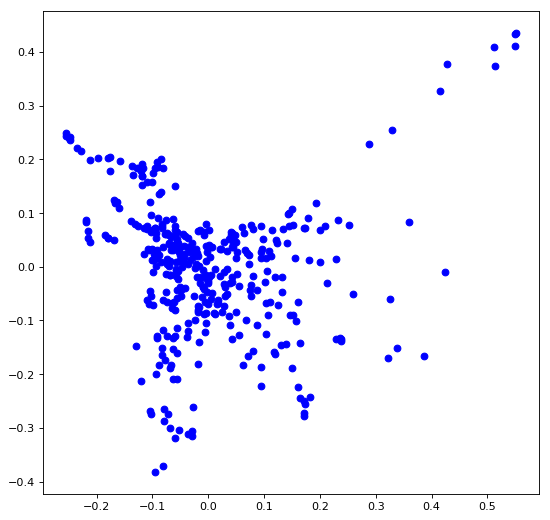

In [63]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
pca_comp = pca.fit_transform(train_data_np)
pca_comp1 = pca.fit_transform(tf_np)
pca_comp[:,0]
pca_comp1[:,0]
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(pca_comp[:,0],pca_comp[:,1],'bo')
plt.show()

In [64]:
from sklearn.cluster import KMeans
num_clusters = 6
km =  KMeans(n_clusters=num_clusters)
%time km.fit(train_data_feature)

Wall time: 1min 5s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [65]:
clusters = km.labels_.tolist()

In [66]:
data['cluster'] = clusters

In [67]:
data

,file_name,text,strip,text_punc,num,non_eng,lower,stop,text_lemma,text_stem,cluster
0,FIM.txt,FIM Sections relating to Limit Review\n\nB.20....,FIM Sections relating to Limit Review B.20.2....,FIM Sections relating to Limit Review B2021 G...,FIM Sections relating to Limit Review B Gener...,to Limit Review B General Policy Approval and ...,to limit review b general policy approval and ...,limit review general policy approval delegatio...,limit review general policy approval delegatio...,limit review gener polici approv deleg market ...,2
1,CTR US KYC PR - FINAL REPORT 20150618.txt,\n\n\n\n\n\nBanking Operations Business Risk a...,Banking Operations Business Risk and Con...,Banking Operations Business Risk and Con...,Banking Operations Business Risk and Con...,Banking Business Risk and Control Management G...,banking business risk and control management g...,banking business risk control management globa...,banking business risk control management globa...,bank busi risk control manag global servic con...,2
2,One HSBC Custody- HSS Oversight Committee Minu...,Attendees:\rInitials\rApologies\rInitials\rRaj...,Attendees: Initials Apologies Initials Rajesh ...,Attendees Initials Apologies Initials Rajesh A...,Attendees Initials Apologies Initials Rajesh A...,RA Partridge AS Milner Tara TH Tony Lewis Mike...,ra partridge as milner tara th tony lewis mike...,ra partridge milner tara th tony lewis mike ma...,ra partridge milner tara th tony lewis mike ma...,ra partridg milner tara th toni lewi mike mark...,1
3,issuer -419868 Contactless.txt,\n\n\n\n\n\nIssuer\nMember Information Questio...,Issuer Member Information Questionnaire ...,Issuer Member Information Questionnaire ...,Issuer Member Information Questionnaire ...,Issuer Member Information Questionnaire Visa T...,issuer member information questionnaire visa t...,issuer member information questionnaire visa f...,issuer member information questionnaire visa f...,issuer member inform questionnair visa form in...,0
4,GS Core Business Team Agenda v1.0_25082015.txt,Date\r25 August 2015\rSt James � Dial In Only ...,Date 25 August 2015 St James � Dial In Only (l...,Date 25 August 2015 St James � Dial In Only la...,Date August St James � Dial In Only lack of ...,Date August St � Dial In Only lack of room ava...,date august st � dial in only lack of room ava...,date august st dial lack room availability lea...,date august st dial lack room availability lea...,date august st dial lack room avail leader pin...,1
5,GBM Mexcio_ITGC Walkthrough PD v1.0.txt,IT General Controls]\nGBM Mexico Walk-through ...,IT General Controls] GBM Mexico Walk-through D...,IT General Controls GBM Mexico Walkthrough Doc...,IT General Controls GBM Mexico Walkthrough Doc...,IT General Document Document type Document nam...,it general document document type document nam...,general document document type document name d...,general document document type document name d...,gener document document type document name doc...,2
6,One HSBC Custody- HSS Oversight Committee Minu...,Attendees:\rInitials\rApologies\rInitials\rRaj...,Attendees: Initials Apologies Initials Rajesh ...,Attendees Initials Apologies Initials Rajesh A...,Attendees Initials Apologies Initials Rajesh A...,RA Partridge AS Fomes Tara TH Martin Tony Lewi...,ra partridge as fomes tara th martin tony lewi...,ra partridge fomes tara th martin tony lewis m...,ra partridge fomes tara th martin tony lewis m...,ra partridg fome tara th martin toni lewi miln...,1
7,Ana Ocampo Inpput and Draft - 2015 Takeovers a...,Response from Ana Ocampo (30/07/2015):\nHi Jon...,"Response from Ana Ocampo (30/07/2015): Hi Jon,...",Response from Ana Ocampo 30072015 Hi Jon Sure...,Response from Ana Ocampo Hi Jon Sure below i...,Response from Ana Hi Sure below is some of the...,response from ana hi sure below is some of the...,response ana hi sure background new agreed yet...,response ana hi sure background new agree yet ...,respons ana hi sure background new agre yet pa...,2
8,7.1 FI

In [68]:
np.bincount(km.labels_)

array([ 89,  50, 201,  19,   9,  23], dtype=int64)

In [69]:
km.cluster_centers_

array([[  7.48427444e-04,   1.91438425e-04,   0.00000000e+00, ...,
          3.89059293e-05,   3.89059293e-05,   3.89059293e-05],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  4.70469972e-04,   8.96945497e-05,   8.18268882e-05, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [70]:
km.inertia_

355.2872721583264

In [71]:
km_model = []
for i in xrange(2,8):
    print ("Running Kmeans with", i , "clusters")
    km_model.append(KMeans(n_clusters=i).fit(train_data_norm))

('Running Kmeans with', 2, 'clusters')
('Running Kmeans with', 3, 'clusters')
('Running Kmeans with', 4, 'clusters')
('Running Kmeans with', 5, 'clusters')
('Running Kmeans with', 6, 'clusters')
('Running Kmeans with', 7, 'clusters')


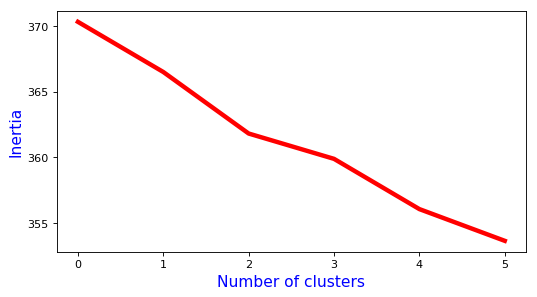

In [72]:


import pickle

with open("KMeans_models", "wb") as fp: 
    pickle.dump(km_model, fp)
    
#with open("KMeans_models", "rb") as fp: 
    #KMeans_model = pickle.load(fp)
inertia = [i.inertia_ for i in km_model]

plt.figure(num=None, figsize=(7, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.array(xrange(len(km_model))),np.array(inertia),linestyle='solid',linewidth=4, color='red')
plt.xlabel('Number of clusters',fontsize=14, color='blue')
plt.ylabel('Inertia',fontsize=14, color='blue')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()
plt.show()



In [73]:
for i in xrange(len(km_model)):
    print ("Num of clusters: ",km_model[i].n_clusters)
    print ("Num of docs in each cluster: ",np.bincount(km_model[i].labels_))
    print ("----------------------------------------------------------------------------------------------------------------")


('Num of clusters: ', 2)
('Num of docs in each cluster: ', array([118, 273], dtype=int64))
----------------------------------------------------------------------------------------------------------------
('Num of clusters: ', 3)
('Num of docs in each cluster: ', array([ 20,  16, 355], dtype=int64))
----------------------------------------------------------------------------------------------------------------
('Num of clusters: ', 4)
('Num of docs in each cluster: ', array([102,  90,  10, 189], dtype=int64))
----------------------------------------------------------------------------------------------------------------
('Num of clusters: ', 5)
('Num of docs in each cluster: ', array([184,  62,  78,  41,  26], dtype=int64))
----------------------------------------------------------------------------------------------------------------
('Num of clusters: ', 6)
('Num of docs in each cluster: ', array([ 41,  94, 178,  53,   6,  19], dtype=int64))
-------------------------------------------

In [74]:
km_model[2].cluster_centers_[km_model[2].labels_].shape

(391L, 500000L)

In [75]:
train_data_np.shape

(391L, 500000L)

In [76]:
import scipy

In [77]:
dist_doc_centroid = np.zeros(shape=(3676))
for i in xrange(train_data_np.shape[0]): 
    cluster_id = km_model[2].labels_[i]
    dist_doc_centroid[i] = scipy.spatial.distance.euclidean(train_data_np[i],km_model[2].cluster_centers_[cluster_id])

In [78]:
dist_doc_centroid

array([ 0.94472761,  0.9852559 ,  0.97573751, ...,  0.        ,
        0.        ,  0.        ])

In [79]:
import pprint

def print_file_with_clusters(num_clusters):
    file_with_clusters = {}
    data['cluster'] = km_model[num_clusters - 2].labels_
    
    for i in xrange(num_clusters):
        file_with_clusters[i] = list(data[data['cluster']==i]['file_name'])
    
    pprint.pprint(file_with_clusters)


In [80]:
print_file_with_clusters(4)

{0: ['FIM.txt',
     'Ana Ocampo Inpput and Draft - 2015 Takeovers and Handovers - FIM (new proposal).txt',
     'Self_assessment_Mosaic_v5.txt',
     'RBWM AML Credit Cards B1.1.15 2014 11 v0.1.txt',
     'RBWM Credit Risk FIM Authority Policy.txt',
     'CSTF BD GOP.txt',
     'BCLD Strategy Briefing v1.3.txt',
     'Malta RfP text.txt',
     'CARS - EOD Trades and Positions - BRD v1.0.txt',
     'Second Line of Defence Legal FIM Guidance RHA v.1.0 6MAY15.txt',
     'Communication for Amendments to Global Risk FIM B2.4.2.txt',
     'Agent key risk Summary Citibank 2012.txt',
     'Global RBWM Data Classification Guideline v2 7.txt',
     'Offsite Archiving and Shredding Proc V.09.txt',
     'GST Review of Global Risk FIM and ISR Standards.txt',
     'Previous IT Contingency Planning Policy (published).txt',
     'Guidance Note on Vendor Management Process_201610.txt',
     'Information Classification FIM policy v1.8.txt',
     '140430 FIM final amends.txt',
     'CBP_-_Malta_Country_

In [81]:
print_file_with_clusters(6)

{0: ['DPA Pause and Resume - Raising GSR.txt',
     'ITO5656 PCE Fact Find Meeting Minutes 2016-04-26.txt',
     'Voice CVC Recording design v2.0.txt',
     'BCLD Strategy Briefing v1.3.txt',
     'Backup Procedures Policies  Plans  Dubai.txt',
     'DPA Pause and Resume - Software Installation Process (v0.2).txt',
     'ICCM_Brazil_Release_Phase1_ENGG_V01.txt',
     'Global RBWM Data Classification Guideline v2 7.txt',
     'DPA Pause and Resume - Raising GSR (Multiple Beneficiaries).txt',
     'DPA Pause and Resume - Quality and Reports.txt',
     'Fact Find Meeting Minutes-ITO5735.txt',
     'DPA Pause and Resume - How to raise IN if unable to install software.txt',
     'DPA Pause and Resume - Basic Troubleshooting (v0.3).txt',
     'Global Collections - Architecture Definition Document (ADD) v0.10.txt',
     'DTCS - Purchasing Ops_Procurement CoE v1.txt',
     'Fact Find Meeting Minutes-ITO5727.txt',
     'HTSE-CLICK-TO-CHAT-ARCHIVE - ITO Architecture Solutions Design Document.txt

     'TermsOfReference_Phase2_D1IM V1.1_final_with_approvals.txt',
     'z_Chapter 51_General Banking Documents required during onboarding_v1.txt',
     '2016 09 07 Data Steer Co Meeting Minutes.txt',
     'Cyber Threat Landscape - October 2016.txt',
     'OMD_WOLF Filter Optimization Project 31052011.txt',
     '150421_FTP_ERB_Minutes.txt',
     'Wesentliche FIM Updates.txt',
     'desktop hardware policies.txt',
     'Phase 2 AMG - HSS Orchestration Layer BPDs V0.3.txt',
     'TS_Current_Acct.txt',
     'FAQs_UK_ver13.1 Updated 06.04.17.txt',
     'PADS Implementation Group Minutes_091213.txt',
     'MC UK GPGB v1.8.txt',
     'IT Project Manager Engagement.txt',
     'GST Review of Global Risk FIM and ISR Standards.txt',
     '2016-11 Canada FRB2 Governance Meeting Minutes.txt',
     'Test_Plan_RBWM MI_V0.6.txt',
     'Info-bytes Restricted Customers.txt',
     'EMV Corporate Cards Handover Form V 1.0.txt',
     'WORLD SELECTION PORTFOLIO BROCHURE - CLIENT FACING.txt',
     'Change 

In [82]:
from __future__ import print_function

print("Top terms per cluster:")
print()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    vectors = []
    print("Cluster %d words:" % i, end='')
    for ind in order_centroids[i, :6]:
        vector = []
        vector.append(float(data['text_lemma'].ix[tfidf_feature_names[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=','))
        vectors.append(vector)
        print (vectors)
    print()
    print()
    print("Cluster %d titles:" % i, end='')
    for title in frame.ix[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print()
    print()

Top terms per cluster:

Cluster 0 words:

C:\Users\44070779\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  # This is added back by InteractiveShellApp.init_path()


TypeError: 'float' object has no attribute '__getitem__'

In [83]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :20]:
        print (' %s' % tfidf_feature_names[ind])
    print

Top terms per cluster:
Cluster 0:
 card
 account
 customer
 pin
 transaction
 data
 file
 message
 debit
 user
 use
 key
 system
 credit
 visa
 number
 interface
 hub
 code
 service
Cluster 1:
 meeting
 test
 project
 open
 action
 team
 close
 digital
 date
 progress
 se
 update
 th
 defect
 status
 release
 feature pack
 manager
 due
 clarity
Cluster 2:
 risk
 business
 global
 project
 must
 information
 data
 management
 please
 group
 policy
 process
 compliance
 document
 provide
 na
 use
 customer
 new
 service
Cluster 3:
 data
 must
 information
 policy
 data must
 risk
 group
 use
 data subject
 aggregation
 business
 privacy
 data quality
 access
 data data
 process
 group data
 compliance
 reference data
 management
Cluster 4:
 legal
 legal department
 department
 general counsel
 counsel
 group
 must
 local
 risk
 legal risk
 litigation
 group legal
 group entity
 relevant
 firm
 general
 local legal
 law
 global
 entity
Cluster 5:
 th
 cat
 emir
 front office
 front
 restr

In [90]:
result = ((tfidf_feature_names[ind] for ind in order_centroids[i, :20]) for i in range(num_clusters))

In [ ]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(pca_comp[:,0],pca_comp[:,1],c=np.array(km_model[4].labels_),s=60)
#labels = ['Variable {0}'.format(i+1) for i in range(388)]
#for i in range(0,388):
 #   xy =(pca_comp[:,0][i],pca_comp[:,1][i])
  #  plt.annotate(labels[i], xy)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(pca_comp[:,0],pca_comp[:,1],c=np.array(km_model[5].labels_),s=60)
labels = ['Variable {0}'.format(i+1) for i in range(388)]
for i in range(0,388):
    xy =(pca_comp[:,0][i],pca_comp[:,1][i])
    plt.annotate(labels[i], xy)
plt.tight_layout()
plt.show()

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go
fig = go.Figure()

In [ ]:
data.file_name[77]

In [ ]:
data.file_name[189]

In [ ]:
data.file_name[247]

In [ ]:
data.file_name[188]

In [ ]:
data.file_name[88]